<a href="https://colab.research.google.com/github/nirajprasad12/ML_project/blob/main/Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Packages
import pandas as pd
import numpy as np
#!pip install xlrd --upgrade 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Data import

In [3]:
#df = pd.read_excel("default of credit card clients.xls") #Read the excel file

df = pd.read_excel("cc.xls")

#Data Wrangling

### Exploratory Data Analysis (EDA)

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Converting Bill amt and Pay amt columns to float

In [5]:
df[df.columns[12:24]] = df[df.columns[12:24]].astype(float) 
df = df.drop('ID', axis=1)

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

### Dropping y labels and storing it in a different variable

In [31]:
y = df['default payment next month']
X = df.drop('default payment next month', axis = 1)

## Visualization to check column correlation

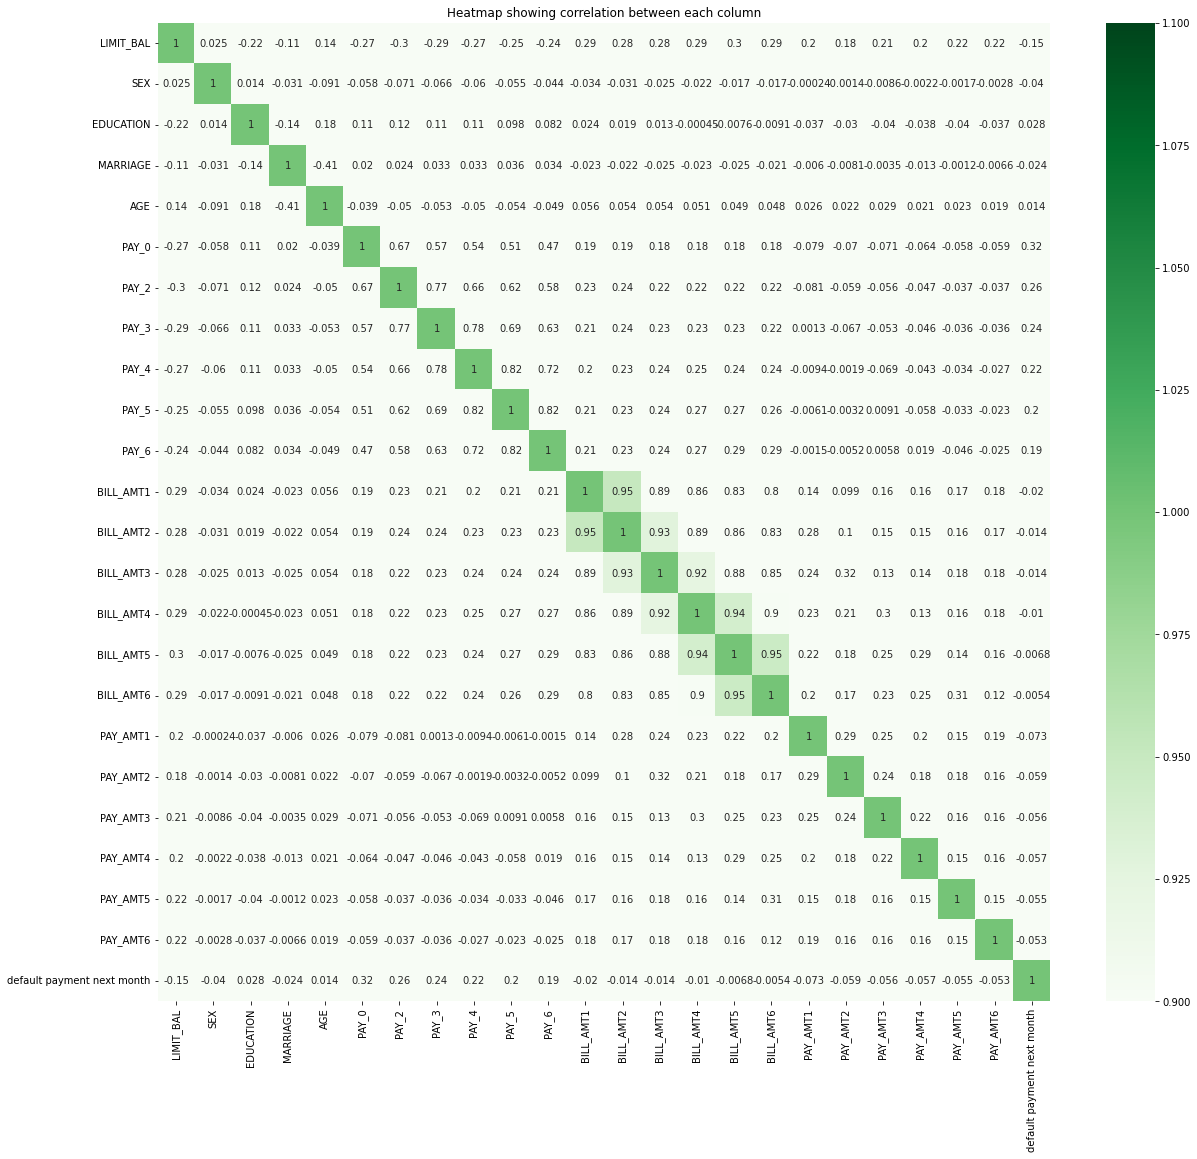

In [16]:
corr = df.corr()
plt.figure(figsize = (20,18))
sns.heatmap(corr, annot = True, vmin = 1.0, cmap = 'Greens')
plt.title('Heatmap showing correlation between each column')
plt.show()

### Nominal vs Ordinal Features

In [17]:
{column: len(df[column].unique()) for column in df.columns}

{'AGE': 56,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'EDUCATION': 7,
 'LIMIT_BAL': 81,
 'MARRIAGE': 4,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'SEX': 2,
 'default payment next month': 2}

### Binary Encoding of Norminal Features Education and Marital Status

In [32]:
edu_df = pd.get_dummies(X['EDUCATION'], prefix = 'EDU')
mar_df = pd.get_dummies(X['MARRIAGE'], prefix = 'MAR')
#df_final = X.copy()
X = pd.concat([X, edu_df, mar_df], axis = 1)
X = X.drop(['EDUCATION', 'MARRIAGE'], axis = 1)

In [33]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_0', 'EDU_1', 'EDU_2', 'EDU_3',
       'EDU_4', 'EDU_5', 'EDU_6', 'MAR_0', 'MAR_1', 'MAR_2', 'MAR_3'],
      dtype='object')

### Scaling

*To standardize all columns to make it even and lie between -1 and +1*

In [37]:
scalar_np = StandardScaler()
X_np = scalar_np.fit_transform(X) # Returns numpy array, converting to PD in next line
X = pd.DataFrame(X_np, columns = X.columns)

Mean of all columns are now very close to 0

In [40]:
X.head(), X.mean()

(   LIMIT_BAL       SEX       AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
 0  -1.136720  0.810161 -1.246020  1.794564  1.782348 -0.696663 -0.666599   
 1  -0.365981  0.810161 -1.029047 -0.874991  1.782348  0.138865  0.188746   
 2  -0.597202  0.810161 -0.161156  0.014861  0.111736  0.138865  0.188746   
 3  -0.905498  0.810161  0.164303  0.014861  0.111736  0.138865  0.188746   
 4  -0.905498 -1.234323  2.334029 -0.874991  0.111736 -0.696663  0.188746   
 
       PAY_5     PAY_6  BILL_AMT1  ...     EDU_1   EDU_2     EDU_3     EDU_4  \
 0 -1.530046 -1.486041  -0.642501  ... -0.738375  1.0669 -0.442752 -0.064163   
 1  0.234917  1.992316  -0.659219  ... -0.738375  1.0669 -0.442752 -0.064163   
 2  0.234917  0.253137  -0.298560  ... -0.738375  1.0669 -0.442752 -0.064163   
 3  0.234917  0.253137  -0.057491  ... -0.738375  1.0669 -0.442752 -0.064163   
 4  0.234917  0.253137  -0.578618  ... -0.738375  1.0669 -0.442752 -0.064163   
 
       EDU_5     EDU_6     MAR_0     MAR_1     MAR_2  

# Train Model using packages to compare Accuracy between different models

## Train - Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

## Logistic Regression

In [47]:
model_LR = LogisticRegression().fit(X_train, y_train)

In [49]:
model_LR.score(X_test, y_test) * 100

81.36666666666666

In [ ]:
# Actual Code (building model)